## Red Neuronal Feed Forward o Alimentada hacia adelante
* Este script contiene una red neuronal alimentada hacia adelante con una capa de entrada de 128 neuronas y 4 clases distintas, una segunda capa de 64 neuronas, tercera capa de 34 neuronas y una capa de salida de 4 clases. Se utiliza el optimizador Adam y la funcion de perdida sparse_categorical_crossentropy
* El dataset utilizado contiene variables referidas a telefonos celulares y el objetivo es predecir el rango de precios al dataset de entrenamiento llamado train.csv
* Luego de entrenar la red se calculan sus metricas a traves de la matriz de confusion
* Finalmente se realizan las predicciones utilizando un dataset de prueba llamado test.csv

## Carga del dataset y Analisis Exploratorio

In [1]:
import pandas as pd 

data = pd.read_csv('train.csv')

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
data['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

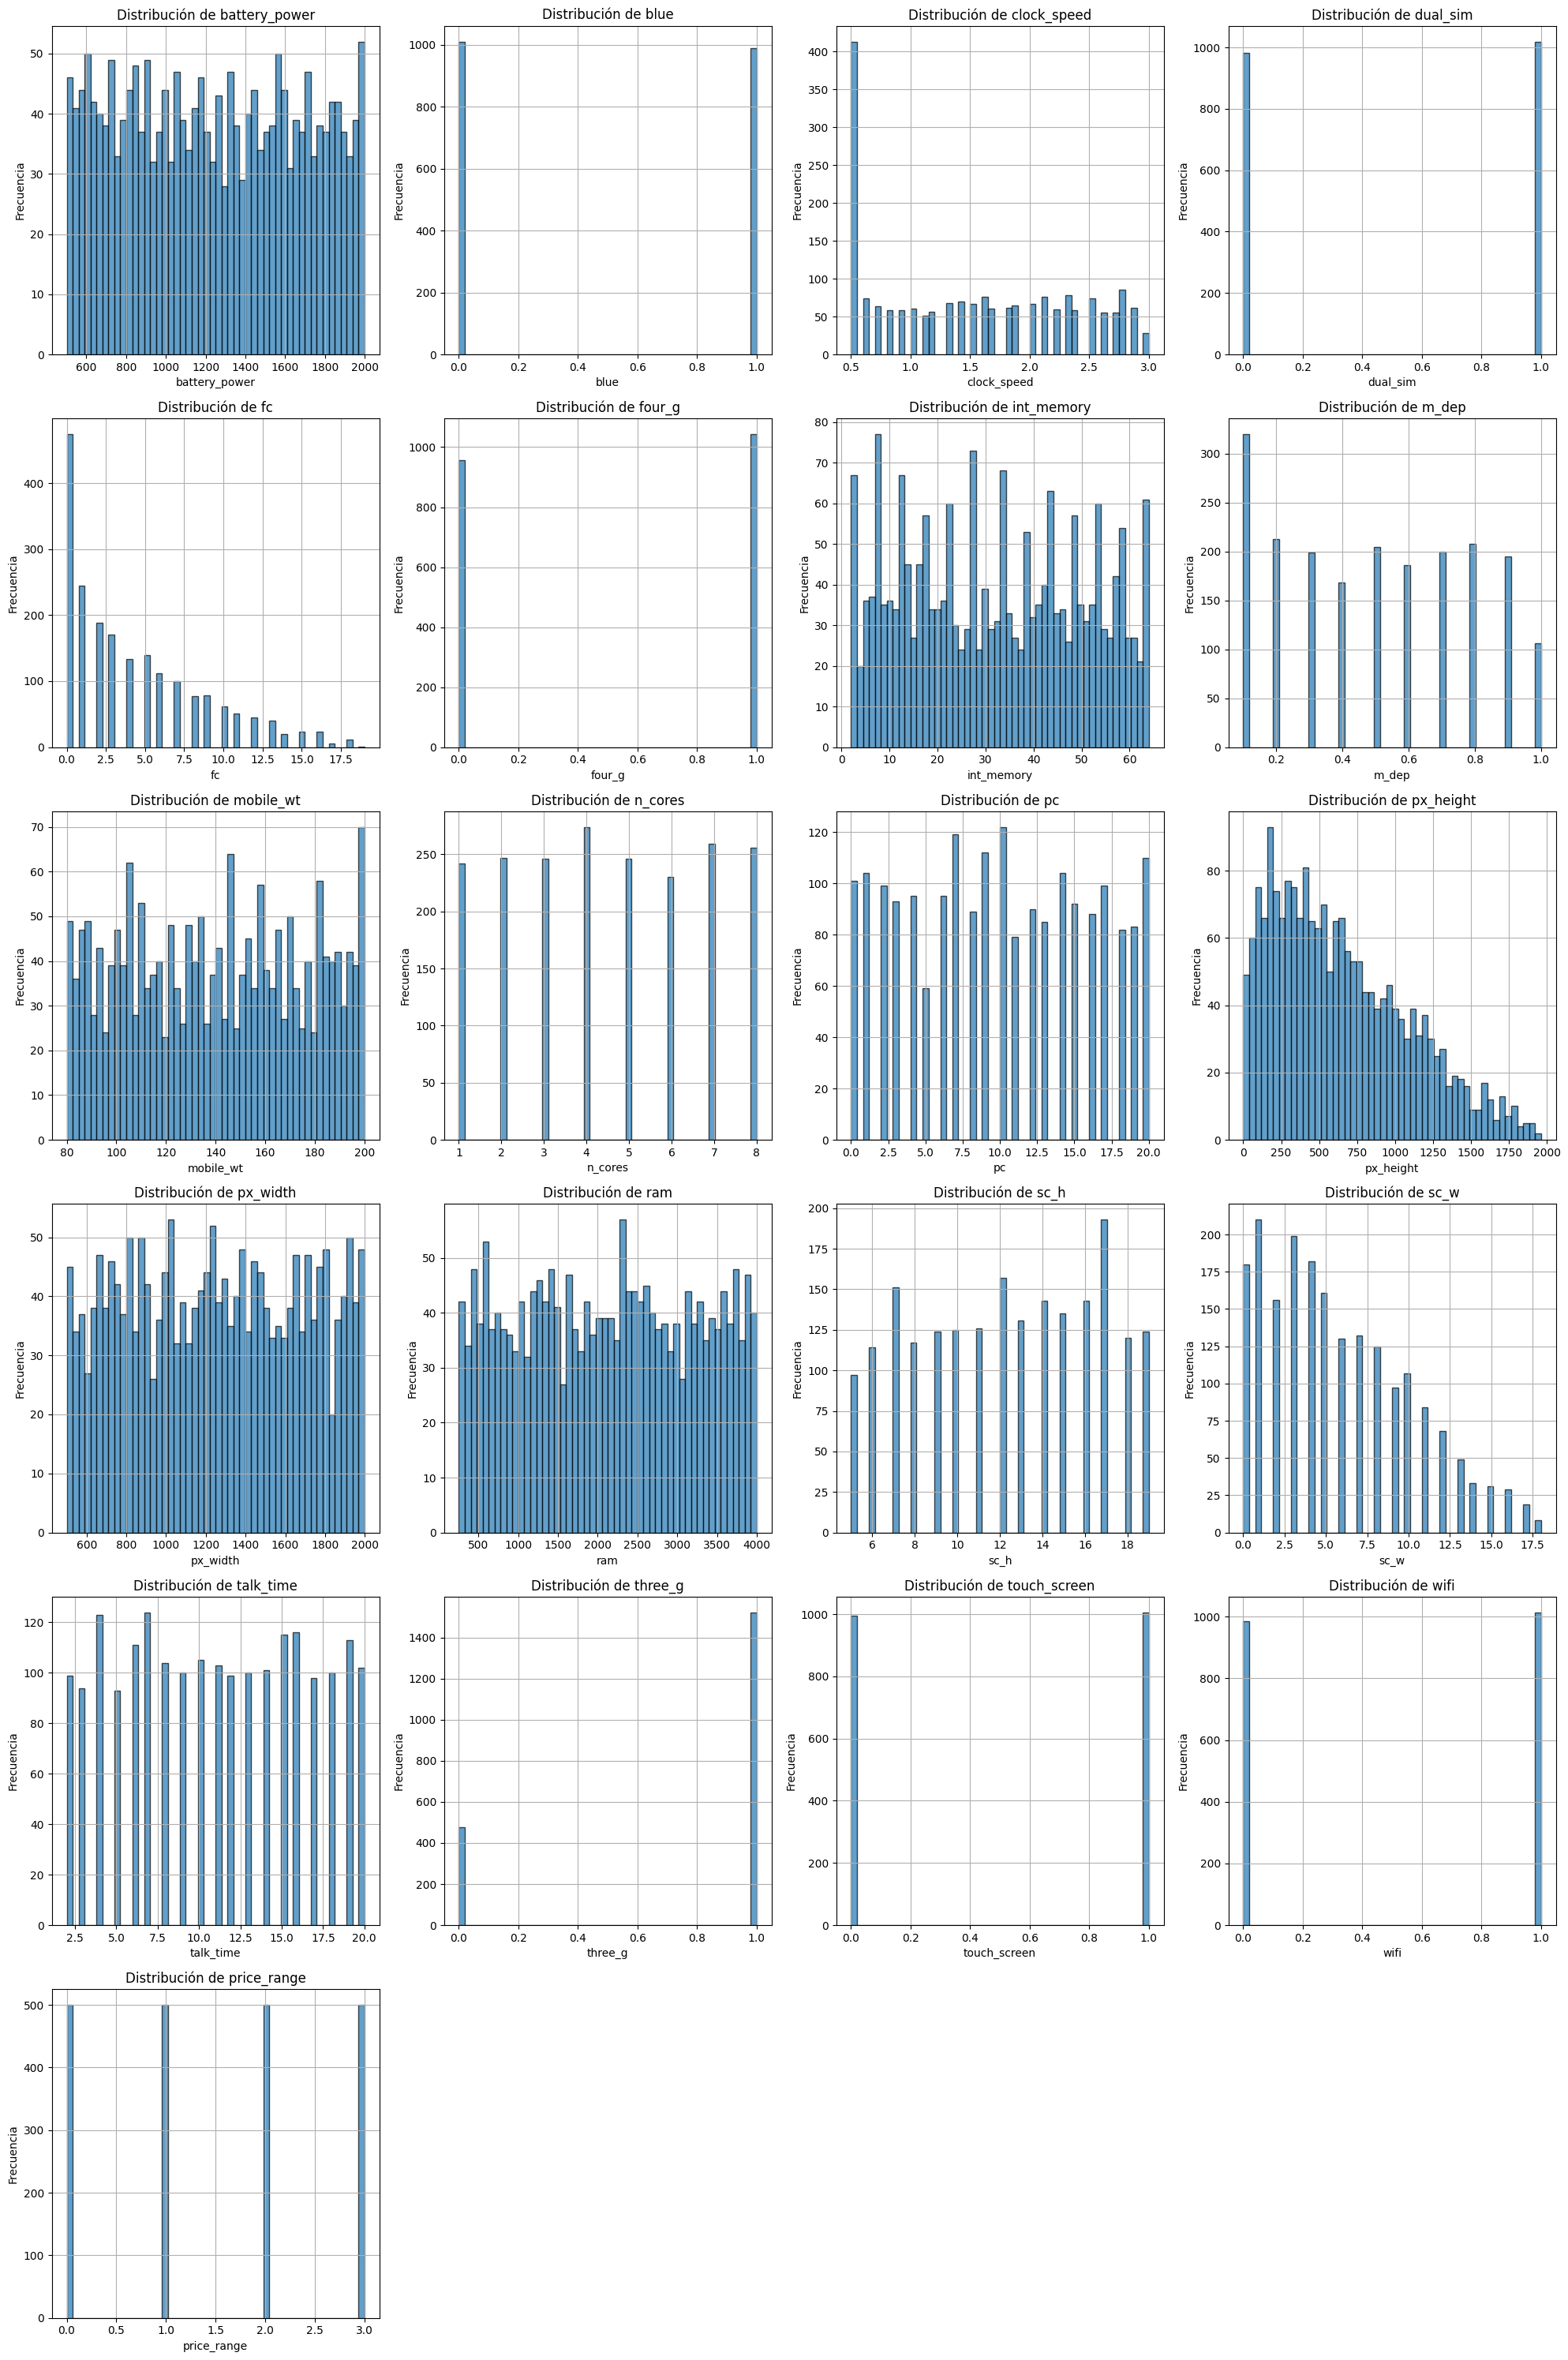

In [4]:
# Graficos de distribucion de frecuencias de todas las variables
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = data.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(data[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Red Neuronal utiizando la libreria Keras

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd

# Separar características y etiquetas
X = data.drop("price_range", axis=1) # Caracteristicas
y = data["price_range"] # Etiqueta

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)

# Construir y entrenar el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax') # En la capa de salida debe ir la cantidad de clases
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_normalized, y_train, epochs=20, batch_size=32, validation_data=(X_val_normalized, y_val), verbose=1)





Epoch 1/20


50/50 [==============================] - 1s 4ms/step - loss: 1.1791 - accuracy: 0.4575 - val_loss: 0.8756 - val_accuracy: 0.6550
Epoch 2/20
50/50 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.7462 - val_loss: 0.4819 - val_accuracy: 0.8300
Epoch 3/20
50/50 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8881 - val_loss: 0.3039 - val_accuracy: 0.8900
Epoch 4/20
50/50 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9325 - val_loss: 0.2397 - val_accuracy: 0.9100
Epoch 5/20
50/50 [==============================] - 0s 1ms/step - loss: 0.1652 - accuracy: 0.9556 - val_loss: 0.2100 - val_accuracy: 0.9175
Epoch 6/20
50/50 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.9688 - val_loss: 0.1891 - val_accuracy: 0.9125
Epoch 7/20
50/50 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9744 - val_loss: 0.1890 - val_accuracy: 0.9150
Epoch 8/20
50/50

13/13 [==============================] - 0s 707us/step


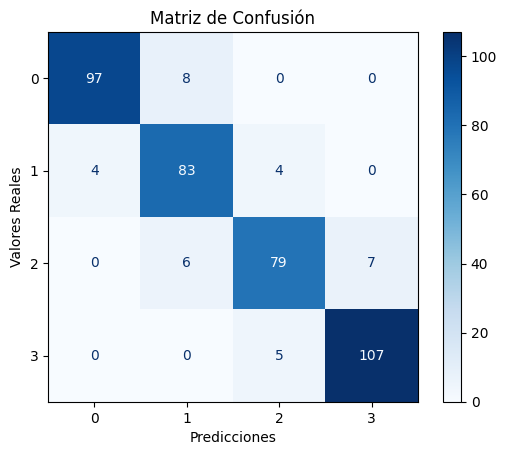

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predecir etiquetas para el conjunto de validación
y_pred = np.argmax(model.predict(X_val_normalized), axis=1)

# Generar matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Mostrar la matriz de confusión con etiquetas
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3])
cm_display.plot(cmap=plt.cm.Blues)

# Agregar título y etiquetas de ejes
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

# Obtener las predicciones del modelo como probabilidades
y_pred = model.predict(X_val_normalized)

# Convertir probabilidades a clases de la salida softmax
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_pred_classes)

# Calcular métricas totales
accuracy = accuracy_score(y_val, y_pred_classes)
precision = precision_score(y_val, y_pred_classes, average='weighted')  # Promedio ponderado
recall = recall_score(y_val, y_pred_classes, average='weighted')  # Promedio ponderado
f1 = f1_score(y_val, y_pred_classes, average='weighted')  # Promedio ponderado

# Imprimir resultados
print(f"Accuracy: {accuracy * 100:.1f}%")
print(f"Precisión: {precision * 100:.1f}%")
print(f"Sensibilidad (Recall): {recall * 100:.1f}%")
print(f"Medida F1 {f1 * 100:.1f}%")


13/13 [==============================] - 0s 729us/step
Accuracy: 91.5%
Precisión: 91.6%
Sensibilidad (Recall): 91.5%
Medida F1 91.5%


## Predicciones utilizando el dataset test.csv

In [8]:
# Evaluamos el modelo entrenado con el conjunto de prueba
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de prueba
test_data = pd.read_csv("test.csv")

# Eliminar columnas no relevantes
X_test = test_data.drop("id", axis=1)

# Normalizar los datos de prueba
X_test_normalized = scaler.transform(X_test)

# Generar predicciones para las primeras 20 muestras
predictions_probs = model.predict(X_test_normalized[:20])
predicted_classes = np.argmax(predictions_probs, axis=1)

# Mostrar las predicciones
print("Predicciones para las primeras 20 muestras del conjunto de prueba:")
print(predicted_classes)


1/1 [==============================] - 0s 14ms/step
Predicciones para las primeras 20 muestras del conjunto de prueba:
[3 3 3 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2]
